# Fundamentals module Project

Solutions for the project assessment for Fundamentals of Data Analysis. Author is Noel Manley (G00387903@hotmail.com).

### Instructions

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. 
To enhance your submission, you might consider comparing simple linear regression toother types of regression on this data set.

### Solution

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# import dataset from githib
df = pd.read_csv("powerproduction.txt")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


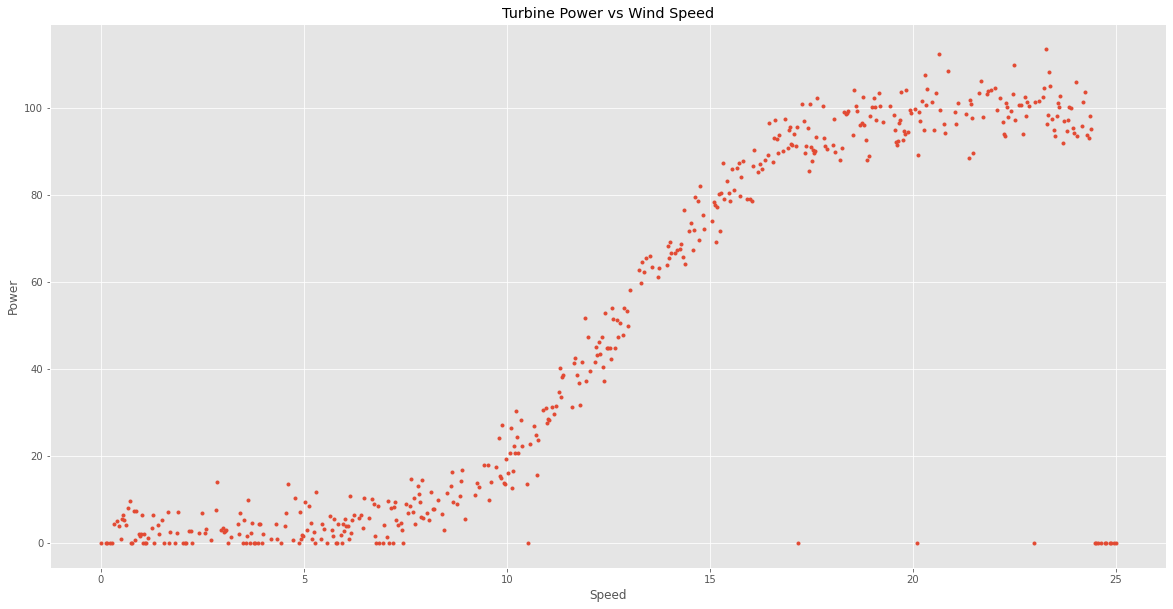

In [20]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# make plot tidier
plt.style.use("ggplot")
# make plot bigger
plt.rcParams["figure.figsize"] = (20,10)

# plot wind speed against power output from dataset
plt.plot(df["speed"], df["power"], '.', label = "Data")

# add title, xlabel and ylabel to plot
plt.title("Turbine Power vs Wind Speed")
plt.xlabel("Speed");
plt.ylabel("Power");